## K近邻模型

k近邻没有显示的计算过程。

## 距离度量

In [1]:
import numpy as np

### 欧式距离

&emsp;&emsp;欧式距离(**Euclidean Distance**)也称欧几里得距离或欧几里得度量，是一种最常用的一种度量方法，主要描述为以下数学形式：两个$n$维向量$\alpha (x_{11}, x_{12}, \cdots ,x_{1n})$和$\beta(x_{21}, x_{22}, \cdots x_{2n})$之间的欧式距离(**euclidean distance**)为其对应分量的平方和再开根号：

$$
d_{12} = \sqrt{\sum_{k=1}^{n}(x_{1k}-x_{2k})^{2}}
$$

&emsp;&emsp;其实说白了就是欧几里得空间中两点的“普通”直线距离。

In [2]:
def euclidean_distance(x, y):
    if len(x) == len(y):
        return (np.sqrt(np.sum(np.power((x - y), 2))))
    else:
        print('Input should be of equal length')
        return (None)
x = np.asarray([1, 2, 3])
y = np.asarray([1, 2, 3])
print(euclidean_distance(x, y))

0.0


### 闵可夫斯基距离

&emsp;&emsp;闵可夫斯基距离(**Minkowski Distance**)也称为**闵式距离**，定义如下：

&emsp;&emsp;两个$n$维向量$\alpha (x_{11}, x_{12}, \cdots ,x_{1n})$和$\beta(x_{21}, x_{22}, \cdots x_{2n})$之间的标**闵可夫斯基距离**为：

$$
d_{12}=\sqrt[p]{\sum_{k=1}^{n}\left(x_{1 k}-x_{2 k}\right)^{p}}
$$

- 当$p=1$时，它是**曼哈顿距离**；
- 当$p=2$时，它是**欧式距离**；
- 当$p=\infty$时，它是**切比雪夫距离**。

&emsp;&emsp;所以闵式距离是上述三种距离的一般性表示。

In [3]:
def IrNorm_distance(x, y, power):
    if len(x) == len(y):
        return (np.power(np.sum(np.power(np.abs(x - y), power)), (1 / (1.0 * power))))
    else:
        print('Input Input should be of equal length')
        return (None)
x = np.asarray([1, 2, 3])
y = np.asarray([1, 2, 3])
print(IrNorm_distance(x, y, 2))

0.0


### 余弦距离

&emsp;&emsp;向量的几何意义不只包含方向，余弦距离(**cosine distance**)是度量两个向量方向差异的一种方法。是方向性地判断，而不是大小的判断。两个方向相同的矢量的余弦相似度为1 ，两个相对于彼此成90°角的向量的相似度为0，而两个完全相反的向量的相似度为-1，而与幅度无关。

&emsp;&emsp;数学表示：两个$n$维向量$\alpha (x_{11}, x_{12}, \cdots ,x_{1n})$和$\beta(x_{21}, x_{22}, \cdots x_{2n})$之间的标**夹角余弦度量**为：

$$
cos(\theta)=\frac{\alpha \cdot \beta}{|\alpha||\beta|}
$$

&emsp;&emsp;即：

$$
\cos (\theta)=\frac{\sum_{k=1}^{n} x_{1 k} x_{2 k}}{\sqrt{\sum_{k=1}^{n} x_{1 k}^{2}} \sqrt{\sum_{k=1}^{n} x_{2 k}^{2}}}
$$

In [4]:
def cosine_distance(x, y):
    if len(x) == len(y):
        return (np.dot(x, y) / np.sqrt(np.dot(x, x) * np.dot(y, y)))
    else:
        print('Input Input should be of equal length')
        return (None)
x = [1, 0]
y = [1, 1]
print('cosine distance:')
print(cosine_distance(x, y))

cosine distance:
0.7071067811865475


### 杰卡德距离

&emsp;&emsp;在了解杰卡德距离之前我们需要了解一下杰卡德相似系数(**Jaccard similarity coefficient**)：


&emsp;&emsp;两个集合$A$和$B$的交集元素在$A$、$B$的并集中所占的比例，称为两个集合的杰卡德相似系数，用符号$J(A,B)$表示：

$$
J(A, B)=\frac{|A \cap B|}{|A \cup B|}
$$



&emsp;&emsp;杰卡德距离描述的是与杰卡德相似系数相反的一个概念：用两个集合中不同元素占所有元素的比例来衡量两个集合的区分度。

$$
J_{\delta}(A, B)=1-J(A, B)=\frac{|A \cup B|-|A \cap B|}{|A \cup B|}
$$

In [5]:
def jaccard_distance(x, y):
    set_x = set(x)
    set_y = set(y)
    return (1 - len(set_x.intersection(set_y)) / len(set_x.union(set_y)))
x = [1, 2, 3]
y = [1, 2, 3]
print('jaccard_distance:')
print(jaccard_distance(x, y))

jaccard_distance:
0.0


### 海明距离

&emsp;&emsp;两个等长二进制串$S_{1}$和$S_{2}$，将其中一个变换为另一个所需要的**最小变换次数**。

&emsp;&emsp;例如：字符串“1111”与“1001”之间的海明距离为2。

In [6]:
def hamming_distance(x, y):
    diff = 0
    if len(x) == len(y):
        for char1, char2 in zip(x, y):
            if char1 != char2:
                diff += 1
        return (diff)
    else:
        print('Input Input should be of equal length')
        return (None)
x = [11001]
y = [10110]
print('hamming_distance:')
print(hamming_distance(x, y))

hamming_distance:
1


## K值的选择

&emsp;&emsp;用较小的领域进行预测。预测结果对邻近的实力点非常敏感。如果邻近的实例点恰好是噪声，预测就会出错。

&emsp;&emsp;用较大的领域进行预测，对于输入实例较远的(已经不太相似)的样本点也会对预测起作用，使预测发生错误。

## 分类决策规则：多数表决

&emsp;&emsp;损失函数可以表示为：

$$
\frac{1}{k} \sum_{x_{i} \in N_{k}(x)} I(y_{i} \neq c_{j})
$$

&emsp;&emsp;其中$I$为指数函数。

## K近邻算法

输入：训练数据集$T=[(x_{1}, y_{1}), \cdots, (x_{N}, y_{N})]$, $x_{i} \in X \subseteq R^{n}$, $y_{i} \in Y = {c_{i}, \cdots, c_{K}}$，实例特征向量$x_{0}$。

1. 根据给定的距离度量，在训练集中找到与$x$最近的$k$个点，涵盖这$k$个点的领域记作$N_{k}(x)$。
2. 在$N_{k}(x)$中根据分类决策规则(如多数表决)决定$x$的类别$y$。输出：实例$x$所属的类别$y$。

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [8]:
# 加载鸢尾花数据
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


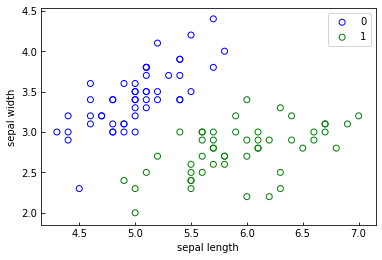

In [9]:
# 可视化sepal length与sepal width之间关系的散点图
plt.figure(figsize=(6,4))
plt.tick_params(direction='in')
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'],c='',edgecolors='b',label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'],c='',edgecolors='g',label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [10]:
# 划分数据集
# 8:2
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
class KNN:
    def __init__(self,X_train,y_train,n_neighbors=3,p=2):
        """
        parameter n_neighbors:the value of k
        parameter p:L distance 
        parameter X_train:
        parameter y_train:
        """
        self.n = n_neighbors # k值
        self.p = p # 距离度量
        self.X_train = X_train # 训练集
        self.y_train = y_train # 标签
        
    def predict(self,X):
        # 先取出n个点
        # 以元组保存计算的距离值和类别 [(dist1,label1),...,(distn,labeln)]
        knn_list=[]
        # 计算n个点的距离值
        for i in range(self.n):
            dist = np.linalg.norm(X-self.X_train[i],ord=self.p)
            knn_list.append((dist,self.y_train[i]))
            
        # 计算数据集中的剩下距离值
        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list,key=lambda x:x[0])) # 每次返回列表中距离最大的索引下标
            dist = np.linalg.norm(X - self.X_train[i],ord=self.p) # 计算新的距离值
            if knn_list[max_index][0] > dist: # 如果当前最大值大于新距离值
                knn_list[max_index] = (dist, self.y_train[i])
        
        # 只保存最近的n个类别
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn) # Counter 计算每个类别的个数
        max_count = sorted(count_pairs.items(),key = lambda x:x[1])[-1][0] # 字典以值排序 返回value最大的key
        return max_count
    
    def score(self,X_test,y_test):
        right = 0
        n = 10
        for X,y in zip(X_test,y_test):
            label = self.predict(X)
            if label == y:
                right += 1
        return right/len(X_test)

In [12]:
clf = KNN(X_train, y_train)

In [13]:
clf.score(X_test, y_test)

1.0

In [14]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


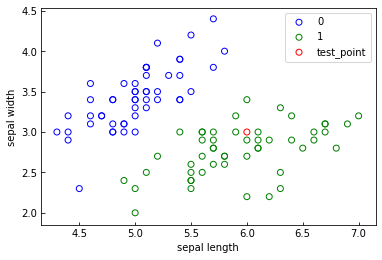

In [15]:
# 可视化测试数据
# 正确分类为 label = 1
plt.figure(figsize=(6,4))
plt.tick_params(direction='in')
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'],c='',edgecolors='b',label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'],c='',edgecolors='g',label='1')
plt.scatter(test_point[0], test_point[1], label='test_point',c='',edgecolors='r')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()